In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/My Drive'
df = pd.read_csv(f'{path}/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df = df.fillna('None')

In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
def blood_pressure_identification(x):
    s,d = x.split('/')[0], x.split('/')[1]
    # hypertensive
    if int(s) > 140 or int(d)>90:
        identify = 1
    elif int(s) < 90 or int(d)<60:
        identify = -1
    else:
        identify = 0

    return identify


In [ ]:
# Discrete feature transformation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
BMI_map = {'Normal Weight':0, 'Normal': 0, 'Overweight':1, 'Obese': 2}
sleep_disorder_map = {'None': 0, 'Sleep Apnea': 1, 'Insomnia':1 }
df['Blood Pressure'] = df['Blood Pressure'].apply(blood_pressure_identification)
df['BMI Category'] = df['BMI Category'].map(BMI_map)
df['Sleep Disorder'] = df['Sleep Disorder'].map(sleep_disorder_map)
categories = ['Gender', 'Occupation']
for f in categories:
    df[f] = label_encoder.fit_transform(df[f])
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,1,0,77,4200,0
1,2,1,28,1,6.2,6,60,8,0,0,75,10000,0
2,3,1,28,1,6.2,6,60,8,0,0,75,10000,0
3,4,1,28,6,5.9,4,30,8,2,0,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,0,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,1,1,68,7000,1
370,371,0,59,5,8.0,9,75,3,1,1,68,7000,1
371,372,0,59,5,8.1,9,75,3,1,1,68,7000,1
372,373,0,59,5,8.1,9,75,3,1,1,68,7000,1


In [ ]:
df.to_csv('df_clean.csv')

### XGboost Model

In [ ]:
# Generate training data set and test data set
from sklearn.model_selection import train_test_split
X = df.drop(['Person ID','Sleep Disorder'],axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42,test_size=0.2, shuffle=True)

In [ ]:
#XGBoost hyperparameters
XGB_p = {'max_depth':range(2, 5), 'n_estimators':range(10, 100, 2), 'learning_rate': [0.04, 0.05, 0.06, 0.07]}

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()
clf = GridSearchCV(xgb_model, XGB_p, n_jobs=-1, cv=5, verbose=0, refit=True, scoring='recall')
clf.fit(X_train, y_train)
best_params = clf.best_params_
print(best_params)
xgb_model.set_params(**best_params)
xgb_model.fit(X_train, y_train)
prediction = xgb_model.predict(X_test)

report = metrics.classification_report(y_test, prediction)
print(report)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 94}
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



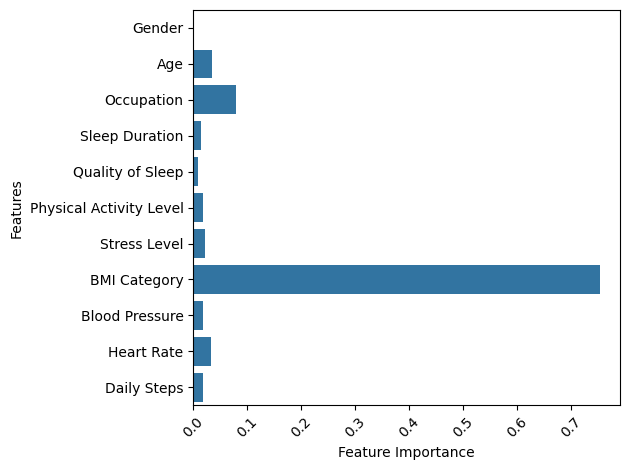

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns

sns.barplot(y=X.columns, x=xgb_model.feature_importances_)
plt.xticks(rotation=45)
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/feature_importance.png')
plt.show()


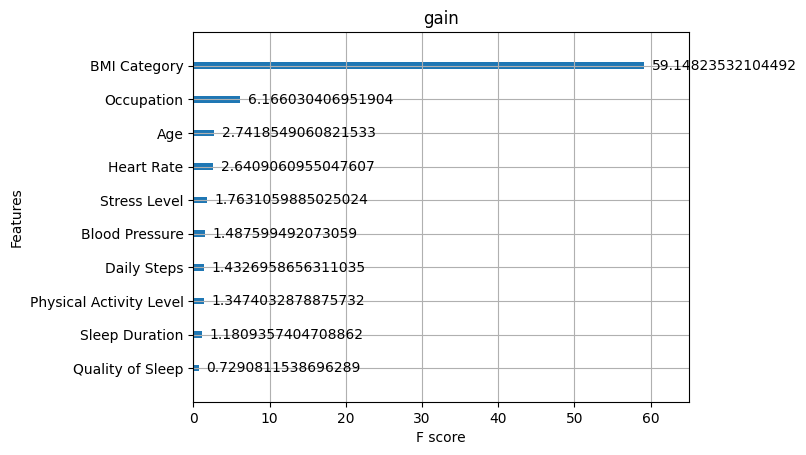

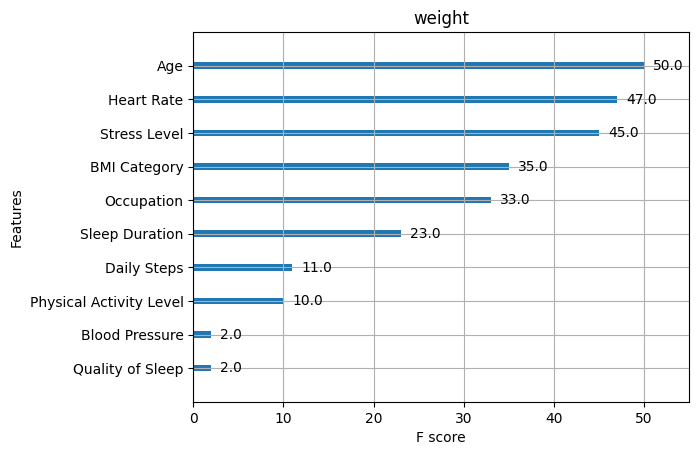

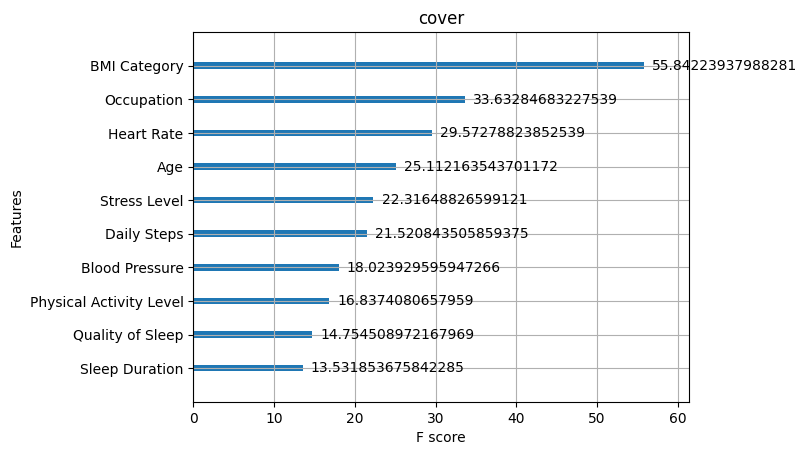

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

def estimate(model):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()

estimate(xgb_model)

In [ ]:
import xgboost as xgb
import graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt


<Figure size 2000x2000 with 0 Axes>

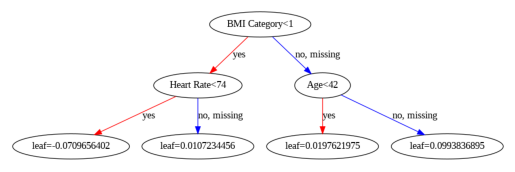

In [ ]:
plt.figure(figsize=(20, 20))
xgb.plot_tree(xgb_model, dpi=500)
plt.savefig('/content/drive/My Drive/tree.png', dpi=500)

## Double Machine Learning

In [ ]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 18.3 MB/s eta 0:00:00


In [ ]:
df1 = df.copy()

In [ ]:
df1.drop(['Person ID', 'Sleep Disorder'], axis=1, inplace=True)
#df1.drop(['Person ID'], axis=1, inplace=True)

In [ ]:
df1

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,1,0,77,4200
1,1,28,1,6.2,6,60,8,0,0,75,10000
2,1,28,1,6.2,6,60,8,0,0,75,10000
3,1,28,6,5.9,4,30,8,2,0,85,3000
4,1,28,6,5.9,4,30,8,2,0,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,1,1,68,7000
370,0,59,5,8.0,9,75,3,1,1,68,7000
371,0,59,5,8.1,9,75,3,1,1,68,7000
372,0,59,5,8.1,9,75,3,1,1,68,7000


In [ ]:
df1['Daily Steps'] = df1['Daily Steps'].apply(lambda x: 0 if x < 10000 else 1)

In [ ]:
df1['Daily Steps'].unique()

array([0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegressionCV,  \
        LinearRegression,LogisticRegression,Lasso,LassoCV
from sklearn.ensemble import RandomForestClassifier,    \
        RandomForestRegressor,GradientBoostingClassifier
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from econml.sklearn_extensions.model_selection import GridSearchCVList
def first_stage_clf(X, y):
    model = GridSearchCVList([RandomForestClassifier(),
                              XGBClassifier()],
                              param_grid_list=[{'max_depth': [5,10,20],'min_samples_leaf': [5, 10], 'n_estimators': range(1,100,10)},
                                               {'max_depth':range(2, 5), 'n_estimators':range(50, 100, 2), 'learning_rate': [0.04, 0.05, 0.06]}],
                                 cv=5,
                                 scoring='recall')
    best_est = model.fit(X, y).best_estimator_

    return best_est

def first_stage_reg(X, y):
    model = GridSearchCVList([RandomForestRegressor(),
                              XGBRegressor()],
                              param_grid_list=[{'max_depth': [5,10,20],'min_samples_leaf': [5, 10], 'n_estimators': range(1,100,10)},
                                               {'max_depth':range(2, 5), 'n_estimators':range(50, 100, 2), 'learning_rate': [0.04, 0.05, 0.06]}],
                                 cv=5,
                                 scoring='neg_mean_squared_error')
    best_est = model.fit(X, y).best_estimator_

    return best_est

In [ ]:
from econml.dml import LinearDML

X = None # no heterogeneous treatment
W = df1.drop(['Quality of Sleep', 'Daily Steps'], axis = 1).values
Y = df1['Quality of Sleep']
T = df1['Daily Steps']
# select the best nuisances model out of econml estimator
model_y=first_stage_reg(W, y)
model_t=first_stage_clf(W, T)
est = LinearDML(model_y=model_y,
                model_t=model_t,
                discrete_treatment=True, mc_iters=5,cv=5)
est.fit(y, T, X=X, W=W, inference="statsmodels")
inf=est.intercept__inference()
effect=int(round(inf.point_estimate))
se=int(round(inf.stderr))
lb,ub=inf.conf_int(alpha=0.05)
print(est.summary(alpha=0.05))

Coefficient Results:  X is None, please call intercept_inference to learn the constant!
                       CATE Intercept Results                       
               point_estimate stderr zstat  pvalue ci_lower ci_upper
--------------------------------------------------------------------
cate_intercept         -0.057   0.07 -0.819  0.413   -0.193    0.079
--------------------------------------------------------------------

<sub>A linear parametric conditional average treatment effect (CATE) model was fitted:
$Y = \Theta(X)\cdot T + g(X, W) + \epsilon$
where for every outcome $i$ and treatment $j$ the CATE $\Theta_{ij}(X)$ has the form:
$\Theta_{ij}(X) = X' coef_{ij} + cate\_intercept_{ij}$
Coefficient Results table portrays the $coef_{ij}$ parameter vector for each outcome $i$ and treatment $j$. Intercept Results table portrays the $cate\_intercept_{ij}$ parameter.</sub>
